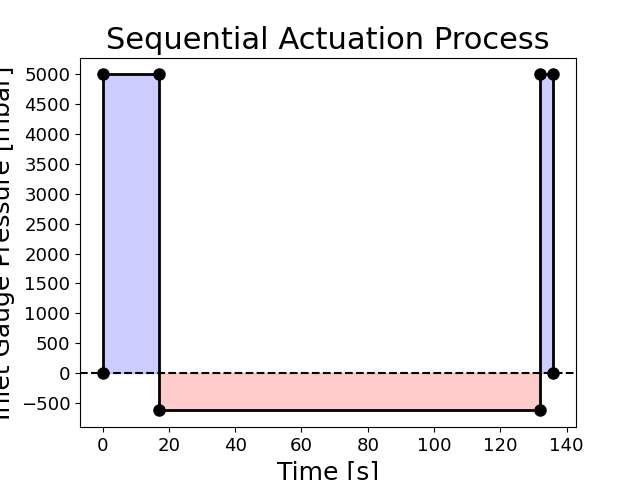

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget
# %matplotlib inline

high_pressure = 5000  # mbar
low_pressure = -625  # mbar
step_times = [0, 0,  17, 0,  1 * 60 + 55, 0, 4, 0]  # seconds
step_pressure = [0, high_pressure, high_pressure, low_pressure, low_pressure, high_pressure, high_pressure, 0]

tick_label_size = 13
axis_label_size = 18
title_size = 22
plot_line_width = 2
marker_size = 8

fig, ax = plt.subplots()
ax.plot(np.cumsum(step_times), step_pressure, drawstyle='steps', marker='o', color='k',
        linewidth=plot_line_width, markersize=marker_size,)
ax.axhline(0, linestyle='--', color='k')
ax.fill_between(np.cumsum(step_times), 0, high_pressure, where=np.array(step_pressure) > 0,
                color='blue', alpha=0.2,
                # transform=ax.get_xaxis_transform()
                )
ax.fill_between(np.cumsum(step_times), low_pressure, 0, where=np.array(step_pressure) < 0,
                color='red', alpha=0.2,
                # transform=ax.get_xaxis_transform()
                )
plt.title("Sequential Actuation Process", size=title_size)
ax.set_ylabel("Inlet Gauge Pressure [mbar]", size=axis_label_size)
ax.set_xlabel("Time [s]", size=axis_label_size)
ax.set_yticks(np.arange(-500, 5500, 500))
ax.tick_params(labelsize=tick_label_size)
# ax.grid()
plt.show()


In [2]:
def align_yaxis(axes): 
    y_lims = np.array([ax.get_ylim() for ax in axes])

    # force 0 to appear on all axes, comment if don't need
    y_lims[:, 0] = y_lims[:, 0].clip(None, 0)
    y_lims[:, 1] = y_lims[:, 1].clip(0, None)

    # normalize all axes
    y_mags = (y_lims[:,1] - y_lims[:,0]).reshape(len(y_lims),1)
    y_lims_normalized = y_lims / y_mags

    # find combined range
    y_new_lims_normalized = np.array([np.min(y_lims_normalized), np.max(y_lims_normalized)])

    # denormalize combined range to get new axes
    new_lims = y_new_lims_normalized * y_mags
    for i, ax in enumerate(axes):
        ax.set_ylim(new_lims[i])  

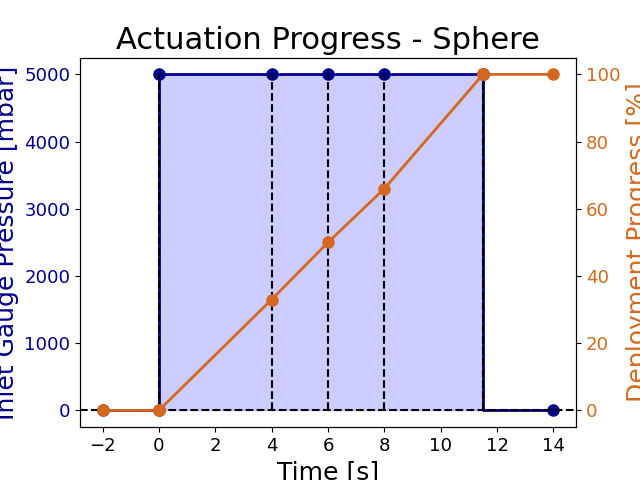

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget
# %matplotlib inline

high_pressure = 5000  # mbar
low_pressure = -625  # mbar
step_times = [-2, 0, 0,  4, 6, 8, 11.5, 11.5, 14]  # seconds
step_pressure = high_pressure * np.ones_like(step_times)
step_pressure[0:2] = 0
step_pressure[-1] = 0
step_percent = [0, 0, 0,  33, 50, 66, 100, 100, 100]
step_pressure[0] = 0
step_pressure[-1] = 0

# pressure_plot_color = "tab:blue"
pressure_plot_color = "darkblue"
# percent_plot_color = "tab:green"
# percent_plot_color = "seagreen"
# percent_plot_color = "darkorange"
percent_plot_color = "chocolate"
# percent_plot_color = "peru"

tick_label_size = 13
axis_label_size = 18
title_size = 22
plot_line_width = 2
marker_size = 8

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(step_times, step_pressure, drawstyle='steps',
        marker='o', color=pressure_plot_color, linewidth=plot_line_width, markersize=marker_size)
ax2.plot(step_times, step_percent, marker='o', color=percent_plot_color,
         linewidth=plot_line_width, markersize=marker_size)
ax.axhline(0, linestyle='--', color='k')
    
ax.fill_between(step_times, 0, high_pressure, where=np.array(step_pressure) > 0,
                color='blue', alpha=0.2,
                # transform=ax.get_xaxis_transform()
                )
# ax.fill_between(step_times, low_pressure, 0, where=np.array(step_pressure) < 0,
#                 color='red', alpha=0.3,
#                 # transform=ax.get_xaxis_transform()
#                 )
plt.title("Actuation Progress - Sphere", size=title_size)
ax.set_ylabel("Inlet Gauge Pressure [mbar]", size=axis_label_size, color=pressure_plot_color)
ax2.set_ylabel("Deployment Progress [%]", size=axis_label_size, color=percent_plot_color)
ax2.tick_params(labelsize=tick_label_size, labelcolor=percent_plot_color)

ax.set_xlabel("Time [s]", size=axis_label_size)
# ax.set_yticks(np.arange(-500, 5500, 500))
# align_yaxis([ax, ax2])

for time, percent, pressure in zip(step_times[2:-2], step_percent[2:-2], step_pressure[2:-2]):
    ymax = (pressure - ax.get_ylim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])
    # ymin = (percent - ax2.get_ylim()[0]) / (ax2.get_ylim()[1] - ax2.get_ylim()[0])
    ymin = (0 - ax2.get_ylim()[0]) / (ax2.get_ylim()[1] - ax2.get_ylim()[0])
    ax.axvline(time, ymin=ymin, ymax=ymax, linestyle='--', color='k')

# ax.set_xlim(ax.get_xlim()[0] - 2, ax.get_xlim()[1] + 2)    
ax.tick_params(labelsize=tick_label_size)
ax.tick_params(axis='y', labelcolor=pressure_plot_color)
# ax.grid()
plt.show()
